# 08 - Descriptive Statistics and Distributions

## Summation and Notation
Many equations in statistics use the *summation* notation, so it is good for us to take a moment to understand how to read this notation.

If we have a series of numbers such as $(1, 4, 5, \dots)$, or written generally as $(x_1, x_2, x_3, \dots, x_N)$ then we can use the *summation* notation as a *shorthand* when we wish to sum-up a sequence of these numbers.

If we want to add a series of elements starting with element $i=1$ up to (and including) element $i=N$, then we can write this as

$$
\sum\limits_{i=1}^{N} x_i
$$

This is shorthand for 

$$
x_1 + x_2 + x_3 + \dots + x_N
$$

For an example, suppose we have a vector $\bf{x}$,
$$
\textbf{x} = 
\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
\end{bmatrix}
=
\begin{bmatrix}
    1 \\
    3 \\
    1 \\
    5 \\
\end{bmatrix}
$$

We can create this vector in the form of a `numpy` array,

In [41]:
import numpy as np

# Let's start with our array x
x = np.array([1, 3, 1, 5])
x

array([1, 3, 1, 5])

Then if we want to add up elements $x_1$ and $x_2$ we can write

$$ \sum\limits_{i=1}^{2} x_i = x_1 + x_2$$


$$ = 1 + 3$$
    
$$= 4$$

In [42]:
# Remember that in Python-land, element indices START WITH 0!
# Sums elements 0 up to 2 (EXCLUDING element 2), so it is the sum of elements at index 0 and 1, i.e. 1+3
np.sum(x[0:2]) 

4

if we want to add up elements $x_2$, $x_3$, and $x_4$ we can write

$$\sum\limits_{i=2}^{4} x_i = x_2 + x_3 + x_4$$

$$= 3 + 1 + 5$$

$$= 9$$

In [43]:
# Sum elements 1 up to the final element, so it is the sum of elements at indices 1, 2 and 3, i.e. 3+1+5 
np.sum(x[1:]) 

9

and if we want to add up all elements from $x_1$ to $x_4$ we can write

$$\sum\limits_{i=1}^{4} x_i = x_1 + x_2 + x_3 + x_4$$

$$= 1 + 3 + 1 + 5$$

$$= 10$$

In [44]:
# Sum all elements from 1 to 4
np.sum(x[0:4])  # np.sum(x[0:]) also works

10

In [45]:
# Can also use x.sum() to sum up all elements regardless of size
np.sum(x) 

10



And the value in the summation can be any function of $x$, so for example we can have

$$
\sum\limits_{i=1}^{N} x_i^2 = x_1^2 + x_2^2 + x_3^2 + ... + x_N^2\\
$$

which means we square each element and add the results together.

More generally we can write

$$
\sum\limits_{i=1}^{N} f(x_i) = f(x_1) + f(x_2) + f(x_3) + ... + f(x_N)\\
$$

where $f$ is just some function (e.g. $\text{exp}$, $\text{sin}$, or some combination of functions). In the above example, we apply a function $f$ to each element $x_i$ and add the results together. 

We can square the example vector $\bf{x}$,
$$
\textbf{x}^2 = 
\begin{bmatrix}
    x_1^2 \\
    x_2^2 \\
    x_3^2 \\
    x_4^2 \\
\end{bmatrix}
=
\begin{bmatrix}
    1^2 \\
    3^2 \\
    1^2 \\
    5^2 \\
\end{bmatrix}
=
\begin{bmatrix}
    1 \\
    9 \\
    1 \\
    25 \\
\end{bmatrix}
$$

In [46]:
# Squaring our vector
x**2

array([ 1,  9,  1, 25])

Now to sum up the squares,
$$
\sum\limits_{i=1}^{4} x_i^2 = x_1^2 + x_2^2 + x_3^2 + x_4^2
$$

$$
= 1^2 + 3^2 + 1^2 + 5^2
$$

$$
= 1 + 9 + 1 + 25 
$$

$$
= 36
$$

In [47]:
# Sum of the squares
np.sum(x**2)

36

## Introduction to Descriptive Statistics

**Descriptive statistics** are used to summarize and describe the important characteristics of a dataset. They provide simple summaries about the sample and the measures. Descriptive statistics are used to describe the basic features of the data in a study.

It is a way to reduce the information of a whole dataset into a smaller number of "descriptive" quantities. This allows us to quickly gain an understanding of data and its characteristics without having to look at each value individually.

But, it's good to pair descriptive statistics with some sort of data visualization. We'll see some examples later on this.

## Measures of Central Tendency

### Mean

The mean is the average of a set of numbers. It is calculated by adding up all the numbers and then dividing by the total number of numbers.

Using summation notation, we can write this as

$$\text{mean}(\textbf{x}) = \frac{1}{N} \sum\limits_{i=1}^{N} x_i$$

$$= \frac{1}{N} (x_1 + x_2 + \dots + x_N)$$

In [48]:
# Remember our vector x
x

array([1, 3, 1, 5])

Note: `len(x)` gives you the length of object `x`. For our example, it gives us the length of our vector `x`, which represents the number of elements in our vector.

In [49]:
n = len(x)
print(f"Number of elements in vector x: {n}")

Number of elements in vector x: 4


In [50]:
# Finding the mean option 1
x.sum()/n

2.5

In [51]:
# Finding the mean option 2
np.mean(x)

2.5

**Note on Using `statistics` Package**

There is also a `statistics` library included with Python that has basic statistical operations such as `mean`, `median`, etc.

But **WARNING**, if you mix `numpy` arrays with `statistics` operations, you can get odd results.

In the below example, our `numpy` array is composed of `int` datatypes, and so if we plug this `numpy` array into `statistics.mean` the output will be also be an `int`, even though the true result has a decimal place.

In [52]:
# Data type of our elements in vector x
x.dtype

dtype('int64')

In [53]:
import statistics

statistics.mean(x) #<--- erroneous result, returns an integer because the input array is of dtype integer

2

If you want to use the `statistics` package with `numpy`, you will have to make the original array with `float` types...

In [54]:
x = np.array([1., 3., 1., 5.])
statistics.mean(x)

2.5

Or, you can avoid mixing `numpy` with `statistics` and use python `lists`, which is what `statistics` is built for.

In [55]:
x = [1, 3, 1, 5]
statistics.mean(x)

2.5

Moving on...

### Median
The median is the middle value of a dataset when it is ordered from least to greatest. If there is an even number of observations, the median is the average of the two middle values.

In [56]:
# Remember our vector x
x

[1, 3, 1, 5]

We can sort our vector,

In [57]:
np.sort(x)

array([1, 1, 3, 5])

In [58]:
# Find the median
np.median(x)

2.0

In [59]:
# Using statistics package
x = [1, 3, 1, 5]
statistics.median(x)

2.0

### Mode
The mode is the value that appears most frequently in a dataset. Lets try to use a histogram to identify the mode of the following vector.

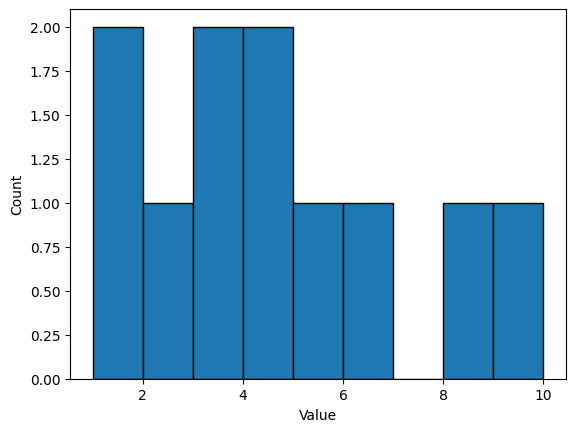

In [60]:
import matplotlib.pyplot as plt

x = np.array(
            [1,1,2,3,3,4,4,5,6,8,10]
            )

plt.hist(x, bins=np.arange(1, 11, 1), edgecolor='black', facecolor='C0')
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

Note there there can be more than one mode, like in the above example.

In [61]:
# Using statistics package
statistics.mode(x) #<--- only returns one value, even if there are multiple modes

1

In [62]:
# Using statistics package
statistics.multimode(x) #<--- returns all modes

[1, 3, 4]

In [63]:
import scipy.stats

# Using the scipy.stats package
mode_result = scipy.stats.mode(x)
mode_result #<--- returns a ModeResult object

ModeResult(mode=1, count=2)

In [64]:
mode_result.mode, mode_result.count #<--- Can access the ModeResult object's values like this.
# Note, only one mode is given

(1, 2)

## Measures of Dispersion

### Range
The range is the difference between the highest and lowest values in a dataset.

$$
\text{Range}(\bf{x}) = \text{highest} - \text{lowest}
$$

In [65]:
# Print the min and max
data = [1, 2, 3, 4, 5]
min(data), max(data)

(1, 5)

In [66]:
# Calculate the range
range_value = max(data) - min(data)
range_value

4

### Variance
The variance measures how spread out the values in a dataset are around the mean. To be more specific, the variance is the average of the squared differences between each data point and the mean of the dataset. 

Before moving on, it's important we talk about **populations** vs **samples** when working with statistical data.


- **Population**: The entire group of individuals, items, or data points that are of interest to a study. For example, if we're interested in the heights of all adults in a country, the population would consist of the heights of every adult in that country. 

  Populations can be *finite*, such as the case of the heights of all adults in a country.

  Populations can also be *infinite* such as when we discuss **theoretical distributions**

  In theoretical probability and statistics, distributions such as the *normal distribution*, *uniform distribution*, *exponential distribution*, etc., are often defined over an infinite range of values. These distributions represent *idealized* mathematical models and are not limited by finite populations.
  

- **Sample**: A *subset* of the population selected for analysis. Since it's often impractical or impossible to collect data from an entire population, we typically take a sample that represents the population.

#### Population Variance
We can define **population variance** as,


$$\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2$$

$$= \frac{1}{N} \left[ (x_1 - \mu)^2 + (x_2 - \mu)^2 + \dots + (x_N - \mu)^2 \right]$$

Where $\mu$ is the population mean (the mean of the entire population), and $N$ is the size of the population.

Let's try to calculate the population variance by hand,

In [67]:
# Find the population mean
x = np.array([1,2,3,4,2,1,4,3,2,1])
x.mean()

2.3

In [68]:
# Subtract the population mean from each element
x-x.mean()

array([-1.3, -0.3,  0.7,  1.7, -0.3, -1.3,  1.7,  0.7, -0.3, -1.3])

In [69]:
# Square the differences
(x-x.mean())**2

array([1.69, 0.09, 0.49, 2.89, 0.09, 1.69, 2.89, 0.49, 0.09, 1.69])

In [70]:
# Average these squared differences to find the population variance
((x-x.mean())**2).mean()

1.21

In [71]:
# Or we can simply use numpy to find the population variance
np.var(x)

1.21

#### Sample Variance
While for a **sample** the variance (sample variance) is defined as

$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

$$= \frac{1}{n-1} \left[ (x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + \dots + (x_n - \bar{x})^2 \right]$$

Where $\bar{x}$ is the sample mean (the mean of the sample), and $n$ is the size of the sample.

By default, `numpy` will calculate the *population variance*. We can change this to a *sample variance* by inserting the `ddof=1` parameter into the `np.var` function.



In [72]:
np.var(x, ddof=1)

1.3444444444444443

**A Normal Distribution**

We can further inspect the difference between population variance and sample variance below where 1000 random numbers following a normal distribution with mean 10 and standard deviation 2 are generated to represent the population data. Additionally, a random sample of size 10 is taken from the population.

Population Variance: 3.8969378252486173
Sample Variance: 4.015539534323802


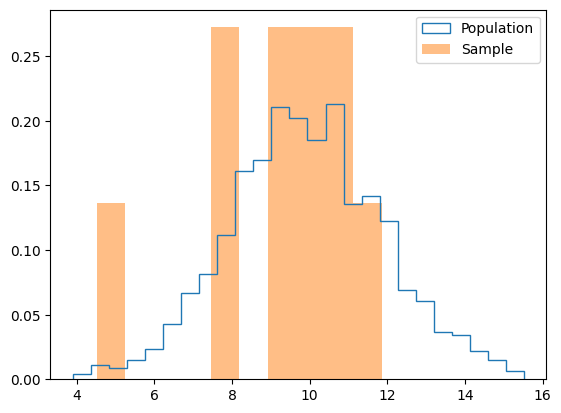

In [73]:
np.random.seed(0)  # for reproducibility
population_data = np.random.normal(loc=10, scale=2, size=1000)  # mean=10, std=2

# print("Theoretical Variance:", 4)

# Calculate population variance
population_var = np.var(population_data)
print("Population Variance:", population_var)

# Take a random sample from the population
sample_data = np.random.choice(population_data, size=10, replace=False)

# Calculate the population variance of the sample
pop_var_of_sample = np.var(sample_data)

# Calculate sample variance
sample_var = np.var(sample_data, ddof=1)
print("Sample Variance:", sample_var)

plt.hist(population_data, bins=25, histtype='step', density=True, label='Population')
plt.hist(sample_data, density=True, alpha=0.5, label='Sample')
plt.legend()
plt.show()

### Standard Deviation
Notice that the units of the variance are the *square* of the units of the original data. We can correct for this unit mismatch by taking the square root of the variance.

When we do this, we have the **standard deviation**.

#### Population Standard Deviation
For a **population** the standard deviation (population standard deviation) is defined as

$$\sigma = \sqrt{\sigma^2}$$

$$= \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}$$

$$= \sqrt{\frac{1}{N} \left[ (x_1 - \mu)^2 + (x_2 - \mu)^2 + \dots + (x_N - \mu)^2 \right]}$$

Where $\mu$ is the population mean (the mean of the entire population), and $N$ is the size of the population.

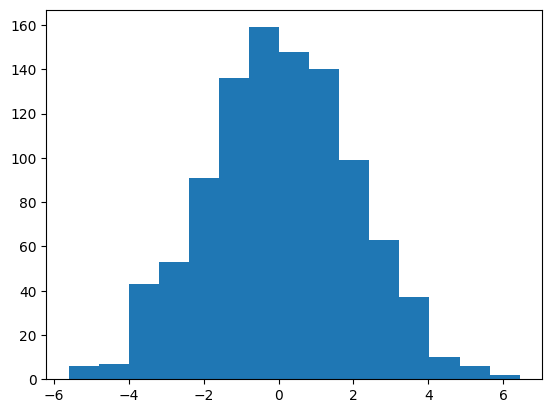

In [95]:
# Create synthetic data for a normal distribution
# The theoretical standard deviation of the distribution should be 2.0, given by the 'scale' paramter
data = np.random.normal(loc=0, scale=2, size=1000)

plt.hist(data, bins=15)
plt.show()

In [75]:
np.std(data) #<---- population standard deviation

2.0146100583191764

#### Sample Standard Deviation
While for a **sample** the standard deviation (sample standard deviation) is defined as

$$s = \sqrt{s^2}$$

$$= \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$= \sqrt{\frac{1}{n-1} \left[ (x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + \dots + (x_n - \bar{x})^2 \right]}$$

Where $\bar{x}$ is the sample mean (the mean of the sample), and $n$ is the size of the sample.

By default, `numpy` calculations the population standard deviation, but you can change this to calculate the sample standard deviation using the `ddof=1` parameter

In [76]:
np.std(data, ddof=1) #<---- sample standard deviation. 
# Notice the difference is negligible because the data set is so large, n=1000

2.015618119457225

## Position Measures
These are statistics that tell us the location of a specific value in a data set with respect to the entire data set.

### Percentile

A percentile divides the data into 100 equally sized parts. 

Then the $k$-th percentile tells you $k\%$ of the data are below that value.

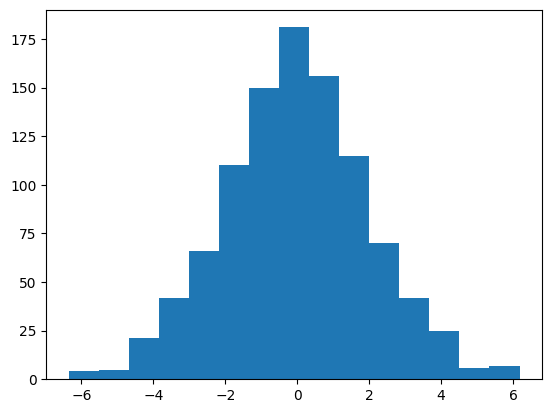

In [77]:
# Synthetic data from a normal distribution
x = np.random.normal(loc=0, scale=2, size=1000)

plt.hist(data, bins=15)
plt.show()

We can use `numpy.quantile(x, q)` to calculate "quantiles", which is just a more general way of saying "percentile".

`q` is the percent value (between 0 and 1) that we want to calcualte the "quantile" or "percentile" for.

The 0-quantile is the minimum value of the data set, because 0% of the existing data is less than this, i.e., no data is below the minimum value by definition.

In [78]:
# Print both 0-quantile and min
np.quantile(x, 0), np.min(x)

(-5.184041400808919, -5.184041400808919)

The 1-quantile (or 100-th percentile) is the maximum value of the data set, because 100% of the data is less than this.

In [79]:
# Print both 1-quantile and max
np.quantile(x, 1), np.max(x)

(5.792261101014201, 5.792261101014201)

And we can check the quantile for any number between 0 and 1, e.g. the 30-percentile is the value for which 30% of the data is less than this value.

In [80]:
np.quantile(x, 0.3)

-1.0692418042359133

We can visualize this,

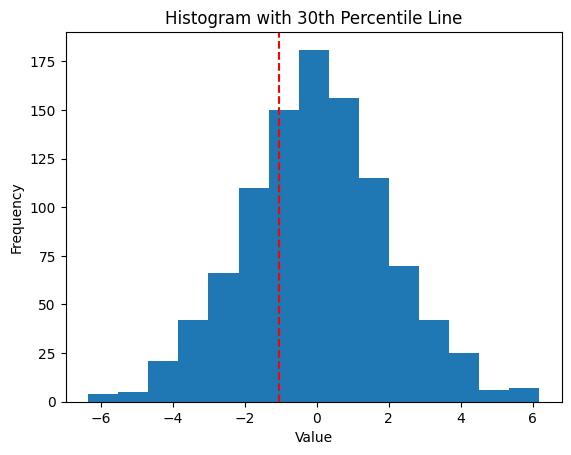

In [81]:
# Calculate the kth percentile
k_quantile = np.quantile(data, 0.3)

# Plot the histogram
plt.hist(data, bins=15)

# Add a vertical red line at the kth percentile
plt.axvline(x=k_quantile, color='red', linestyle='--')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with 30th Percentile Line')
plt.show()

If we divide the data set into four equally sized parts, then we call them "quartile"

In [82]:
for quantile_level in [0, 0.25, 0.5, 0.75, 1.0]:
    print(quantile_level, round(np.quantile(x, quantile_level), 3))

0 -5.184
0.25 -1.312
0.5 0.125
0.75 1.306
1.0 5.792


These are the quantiles we see in a box plot.

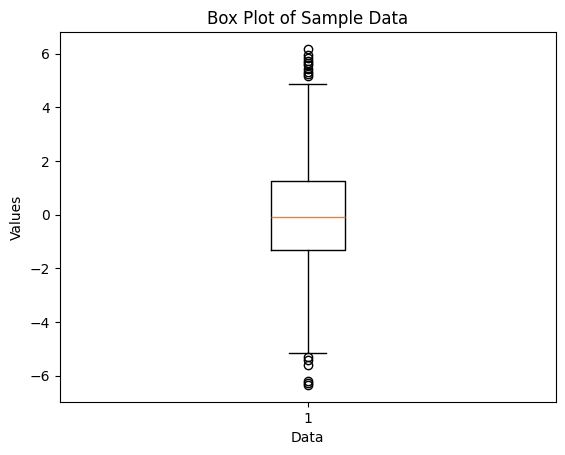

In [83]:
# Create a box plot
plt.boxplot(data)

plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot of Sample Data')
plt.show()

## Shape Measures

### Skewness
This measures the asymmetry of a dataset around its mean. We can calculate it using the `scipy.stats.skew()` function.

<p align="center">
  <img src="imgs/skewness.png" alt="Alt text" width="1000" height="400">
</p>

A positive skewness indicates that most of the data are on the left and there are a few very high values on the right, as shown below

Skewness: 1.94


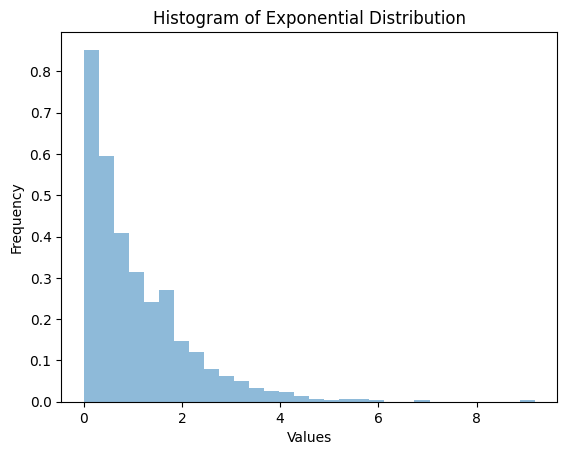

In [84]:
# Generate data from an exponential distribution (positively skewed)
data = np.random.exponential(scale=1, size=1000)

# Calculate skewness
skewness = scipy.stats.skew(data)

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5)
plt.title("Histogram of Exponential Distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")

print(f'Skewness: {skewness:.2f}')

plt.show()

A negative skewness indicates that there are more unusual low values.

Skewness: -2.04


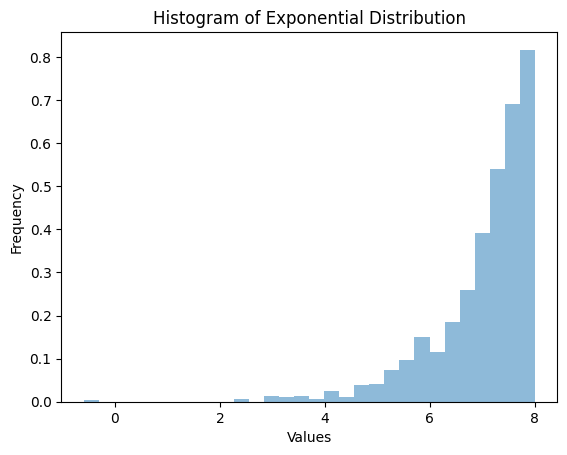

In [85]:
# Generate data from an exponential distribution (positively skewed)
data = -np.random.exponential(scale=1, size=1000)+8

# Calculate skewness
skewness = scipy.stats.skew(data)

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5)
plt.title("Histogram of Exponential Distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")

print(f'Skewness: {skewness:.2f}')

plt.show()

If it is close to zero it suggests that the data are quite symmetrical.

Skewness: -0.04


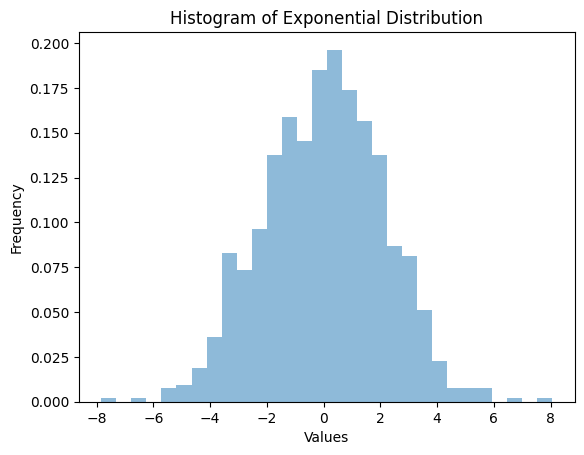

In [86]:
data = np.random.normal(loc=0, scale=2, size=1000)

# Calculate skewness
skewness = scipy.stats.skew(data)

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5)
plt.title("Histogram of Exponential Distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")

print(f'Skewness: {skewness:.2f}')

plt.show()

### Kurtosis
Kurtosis measures the "tailedness" of the distribution of values. In other words, it measures the concentration of data around the mean.

<p align="center">
  <img src="imgs/kurtosis.png" alt="Alt text" width="400" height="300">
</p>

A positive kurtosis indicates a sharper peak compared to the normal distribution. 

A negative kurtosis indicates a flatter peak and lighter tails. 

A kurtosis close to zero suggests a shape similar to that of the normal distribution.

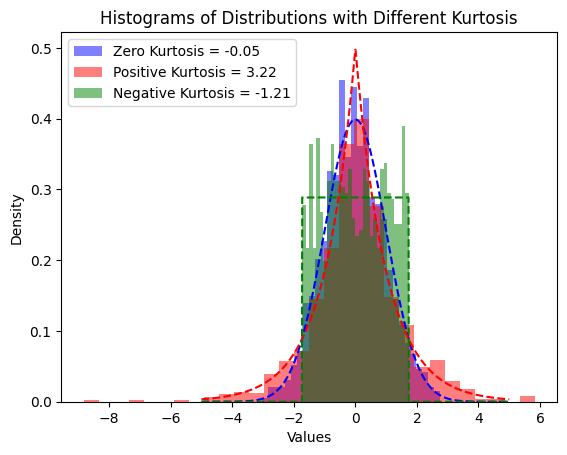

In [87]:
from scipy.stats import norm, laplace, uniform
from scipy.stats import kurtosis

# Set seed for reproducibility
np.random.seed(0)

# Generate data for three distributions with different kurtosis values
data1 = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution with zero kurtosis
data2 = laplace.rvs(loc=0, scale=1, size=1000)  # Laplace distribution with positive kurtosis
data3 = uniform.rvs(loc=-np.sqrt(3), scale=2*np.sqrt(3), size=1000)  # Uniform distribution with negative kurtosis

# Calculate kurtosis values
data1_kurt = kurtosis(data1)
data2_kurt = kurtosis(data2)
data3_kurt = kurtosis(data3)

# Plot histograms of the three distributions
plt.hist(data1, bins=30, density=True, alpha=0.5, color='blue', label=f'Zero Kurtosis = {round(data1_kurt, 2)}')
plt.hist(data2, bins=30, density=True, alpha=0.5, color='red', label=f'Positive Kurtosis = {round(data2_kurt, 2)}')
plt.hist(data3, bins=30, density=True, alpha=0.5, color='green', label=f'Negative Kurtosis = {round(data3_kurt, 2)}')

# Plot the theoretical density functions
x = np.linspace(-5, 5, 1000)
plt.plot(x, norm.pdf(x, loc=0, scale=1), linestyle='--', color='blue')
plt.plot(x, laplace.pdf(x, loc=0, scale=1), linestyle='--', color='red')
plt.plot(x, uniform.pdf(x, loc=-np.sqrt(3), scale=2*np.sqrt(3)), linestyle='--', color='green')

plt.title('Histograms of Distributions with Different Kurtosis')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()
